# Введение в анализ данных
## НИУ ВШЭ, 2019-2020 учебный год

### Домашнее задание №4

Задание выполнил(а): Щекотов Иван Сергеевич

### Общая информация

__Дата выдачи:__ 24.05.2020

__Дедлайн:__ 23:59 07.06.2020


### Оценивание и штрафы

Оценка за ДЗ вычисляется по следующей формуле:

$$
min(\text{points}, 19)  \times 10 / 19,
$$

где points — количество баллов за обязательную часть, которое вы набрали. Максимальное число баллов, которое можно получить за обязательную часть — 19, а максимальное число дополнительных баллов, которые пойдут в бонус — 1.

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

Инвайт для группы ИАД-4: zG1cIyT

Перед отправкой перезагрузите ноутбук и проверьте, что все ячейки могут быть последовательно выполнены. Ноутбук должен запускаться с использованием python 3.6+

In [120]:
import numpy as np
from sklearn.datasets import load_breast_cancer, load_boston
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

## Random Forest своими руками (4 балла)

Реализуйте алгоритм случайного леса. В соответствии с построением алгоритма, ваша реализация должна сочетать в себе метод бэггинга и метод случайных подмножеств. Также она должна работать для двух типов задач: как для задачи регрессии, так и для задачи классификации.

*Примечание. Вы можете использовать `DecisionTree` из `sklearn`.*

In [125]:
class RandomForest:
    def __init__(self, n_estimators=100, max_depth=3, max_features='sqrt', task_type='regression'):
        """
        PARAMETERS:
        n_estimators - number of trees in the ensemble
        max_depth - maximum depth of a tree
        max_features - maximum features for each split in DecisionTree from sklearn
        task_type - 'regression' or 'classification'
        """
        self.N = n_estimators
        self.depth = max_depth
        self.split_features = max_features
        self.type = task_type
        

    def _bs_samples(self, nsamples, sh_0):
        idx = np.random.randint(0, sh_0, size=nsamples)
        return idx

    def fit(self, X_train, y_train):
        """
        INPUT:
        X_train - np.array of shape (k, d)
        y_train - np.array of shape (k,)
        """
        self.tree_lst = []
        for i in range(self.N):
            if self.type == "regression":
                if self.split_features == "sqrt":
                    tree = DecisionTreeRegressor(max_features=int(np.sqrt(X_train.shape[1])), max_depth=self.depth)
                elif self.split_features == "third":
                    tree = DecisionTreeRegressor(max_features=int(X_train.shape[1] / 3), max_depth=self.depth)
            elif self.type == "classification":
                if self.split_features == "sqrt":
                    tree = DecisionTreeClassifier(max_features=int(np.sqrt(X_train.shape[1])), max_depth=self.depth)
                elif self.split_features == "third":
                    tree = DecisionTreeClassifier(max_features=int(X_train.shape[1] / 3), max_depth=self.depth)
            idx = self._bs_samples(int(X_train.shape[0]), X_train.shape[0])
            x_sample = X_train[idx]
            y_sample = y_train[idx]
            tree.fit(x_sample, y_sample)
            self.tree_lst.append(tree)
        
    def predict(self, X_test):
        """
        INPUT:
        X_test - np.array of shape (m, d)
        
        OUTPUT:
        y_pred - np.array of shape (m,)
        """
        res_lst = []
        for tree in self.tree_lst:
            res = tree.predict(X_test)
            res_lst.append(res)
        res = np.array(res_lst)
        if self.type == "classification":
            pred = np.apply_along_axis(np.bincount, 0, res)
            y_pred = np.apply_along_axis(np.argmax, 0, pred)
        elif self.type == "regression":
            y_pred = np.sum(res, axis=0) / self.N

        return y_pred

Проверьте вашу реализацию на задаче регрессии. Подберите оптимальные гиперпараметры, чтобы получить MSE < 10.25 **(не меняйте параметры сида)**.

## Regression

In [126]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [127]:
boston = load_boston()
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

In [128]:
#regression

#RandomForestRegressor
n_estimators, depth = (1000, 30)
np.random.seed(19052019)
rf_py = RandomForestRegressor(n_estimators=n_estimators, max_depth=depth, max_features="sqrt", bootstrap=True)
rf_py.fit(X_train, y_train)
y_pred_py = rf_py.predict(X_test)
print(f"RandomForestRegressor MSE : {mean_squared_error(y_pred_py, y_test)}")

#implementation
rf = RandomForest(n_estimators=n_estimators, max_depth=depth)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f"RandomForest (implementation) MSE : {mean_squared_error(y_pred, y_test)}")
assert(mean_squared_error(y_pred, y_test) < 10.25)

RandomForestRegressor MSE : 9.946354028139854
RandomForest (implementation) MSE : 9.924998128579608


Проверьте вашу реализацию на задаче классификации. Подберите оптимальные гиперпараметры, чтобы получить accuracy > 0.83 **(не меняйте параметры сида)**.

## Classification

In [129]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

In [130]:
#classification

#RandomForestClassifier
np.random.seed(19052019)
n_estimators, depth = (1000, 8)
np.random.seed(19052019)
rf_py = RandomForestClassifier(n_estimators=n_estimators, max_depth=depth, max_features="sqrt", bootstrap=True)
rf_py.fit(X_train, y_train)
y_pred_py = rf_py.predict(X_test)
print(f"RandomForestRegressor Accuracy : {accuracy_score(y_pred_py, y_test)}")

#RandomForest implementation
rf = RandomForest(n_estimators=n_estimators, max_depth=depth, task_type="classification", max_features="sqrt")
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f"RandomForest (implementation) Accuracy : {accuracy_score(y_pred, y_test)}")
assert(accuracy_score(y_pred, y_test) > 0.83)

RandomForestRegressor Accuracy : 0.9370629370629371
RandomForest (implementation) Accuracy : 0.9440559440559441


## Градиентный бустинг своими руками (5 + 1* баллов)

Реализуйте алгоритм градиентного бустинга для регрессии. Напомним основные формулы.

Обозначим текущую композицию на $N-1$ шаге за $a_{N - 1}(x_i)$. Следующий базовый алгоритм $b_N(x_i)$ обучается на ответах $-\frac{\partial L(y_i, z)}{\partial z}\Bigl|_{z = a_{N - 1}(x_i)}$, где $L(y_i, z)$ — значение функции потерь на объекте при правильном ответе $y_i$ и предсказании $z$. Композиция на следующем шаге получается следующим образом:

$$
a_N(x_i) = a_{N-1}(x_i) + \nu\gamma_Nb_N(x_i)
$$

Здесь $\nu$ — гиперпараметр learning rate, $\gamma_N$ — оптимальный вес, настраиваемый на каждом шаге алгоритма, который можно найти по следующей формуле (обратите внимание на отсутствие $\nu$):

$$
\gamma_N = \mathrm{arg}\min_\gamma \frac{1}{\ell}\sum\limits_{i=1}^{\ell}L\left(y_i, a_{N - 1}(x_i) + \gamma b_N(x_i)\right)
$$

Можете принять $\gamma_N = 1$ для каждого $N$. Однако чтобы получить дополнительный 1 балл вам нужно реализовать нахождение оптимального $\gamma_N$ на каждом шаге.

В качестве функции потерь возьмите MSE.

*Примечание. Вы можете использовать `DecisionTree` из `sklearn` и методы оптимизации из различных библиотек.*

In [131]:
# это может помочь вам для поиска оптимальных gamma

from scipy.optimize import minimize

In [132]:
class GradientBoosting:
    def __init__(self, n_estimators=100, max_depth=3, learning_rate=0.1, tune=False):

        """
        PARAMETERS:
        n_estimators - number of trees in the ensemble
        max_depth - maximum depth of a tree
        learning_rate - coefficient by which new algorithm result is multiplied
        """

        self.n = n_estimators
        self.depth = max_depth
        self.nu = learning_rate
        self.gamma = 1
        self.tune = tune
        
    def _loss_gradient(self, y_pred, y):
        return 2 * (y_pred - y)

    def _loss_func(self, x, args):
        tmp_pred, tmp_obj = args[0], args[1]
        return np.sum(np.power(tmp_obj - x * tmp_pred, 2), axis=0)

    def fit(self, X_train, y_train):
        
        """
        INPUT:
        X_train - np.array of shape (k, d)
        y_train - np.array of shape (k,)
        """

        self.regressor_lst = []
        self.gamma_lst = []
        y_pred_train = np.apply_along_axis(np.mean, 1, X_train).mean()
        self.pred = y_pred_train
        for i in range(self.n):
            residuals = -self._loss_gradient(y_pred_train, y_train)
            regressor = DecisionTreeRegressor(max_depth = self.depth)
            regressor.fit(X_train, residuals)
            self.regressor_lst.append(regressor)
            self.gamma_lst.append(self.gamma)
            prediction = regressor.predict(X_train)
            if self.tune == True:
                y_pred_minimize = y_pred_train + prediction * self.gamma
            y_pred_train += self.gamma * self.nu * prediction
            if self.tune == True:
                args = (y_pred_minimize, y_train)
                self.gamma = minimize(self._loss_func, self.gamma, args=(args,), method='Nelder-Mead', options={'xtol': 1e-8, 'disp': False}).x

    def predict(self, X_test):
        """
        INPUT:
        X_test - np.array of shape (m, d)
        
        OUTPUT:
        y_pred - np.array of shape (m,)
        """

        y_pred = self.pred
        for i in range(len(self.regressor_lst)):
            if self.tune == False:
                y_pred += self.nu * self.regressor_lst[i].predict(X_test)
            else:
                y_pred += self.nu * self.gamma_lst[i] * self.regressor_lst[i].predict(X_test)

        return y_pred

Проверьте вашу реализацию. Подберите оптимальные гиперпараметры, чтобы получить MSE < 10 как в обычном случае, так и при нахождении оптимального шага **(не меняйте параметры сида)**.

In [133]:
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

In [134]:
#optimal params (gamma not optimized)
n_estimators = 130
lr = 0.11
max_d = 6

np.random.seed(19052019) # если убрать, то сид сбивается
gb = GradientBoosting(n_estimators=n_estimators, max_depth=max_d, learning_rate=lr)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
assert(mean_squared_error(y_test, y_pred) < 10)
mean_squared_error(y_test, y_pred)

9.509299529939677

In [135]:
# 100, 0.127, 7 – optimal with gamma
n_estimators = 100
lr = 0.127
max_d = 7
np.random.seed(19052019) # если убрать, то сид сбивается
gb = GradientBoosting(n_estimators=n_estimators, max_depth=max_d, learning_rate=lr, tune=True)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
assert(mean_squared_error(y_test, y_pred) < 10)
print(mean_squared_error(y_test, y_pred))

9.215136808840779


### Да

Для удобства проверяющего укажите, пожалуйста, реализовали ли вы нахождение оптимального шага?

- Да / Нет

## Ансамблевые методы (10 баллов)

Сопровождайте код изображениями и комментариями. Не игнорируйте вопросы, ваши выводы тоже оцениваются. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше. Не забывайте подписывать графики и будет вам счастье!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

**0. (0 баллов) ** Загрузите [датасет](https://www.kaggle.com/uciml/pima-indians-diabetes-database/data), в нем вы найдете данные опрошенных женщин из индейского племени Пима. Будем решать задачу бинарной классификации: в колонке Outcome лежит метка наличия или отсутствия диабета - это наша целевая переменная. Есть ли пропущенные значения?

In [17]:
data = pd.read_csv('./diabetes.csv')

In [18]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
data.shape

(768, 9)

In [19]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [20]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**1. (0.5 балла)** Как вы думаете, является ли наличие нулей в некоторых колонках фактом того, что эти признаки имеют пропущенные значения? Замените нули на среднее значение признака там, где считаете это целесообразным.

In [23]:
data.isin([0]).sum(axis = 0)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [24]:
to_change = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in to_change:
    data[col].replace(0, np.mean(data[col]), inplace=True)

data.isin([0]).sum(axis = 0)

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Pregnancies и Outcome бинарные признаки, которые могут и должны принимать в том числе нулевые значения. Остальные пропуски заменены средним значением по признаку

**2. (1 балл)** Визуализируйте распределение признаков по отдельности для больных диабетом и здоровых. Ваши графики должны быть примерно такими:

![Image](https://d.radikal.ru/d03/2005/f8/0ffb9443cbcf.png)

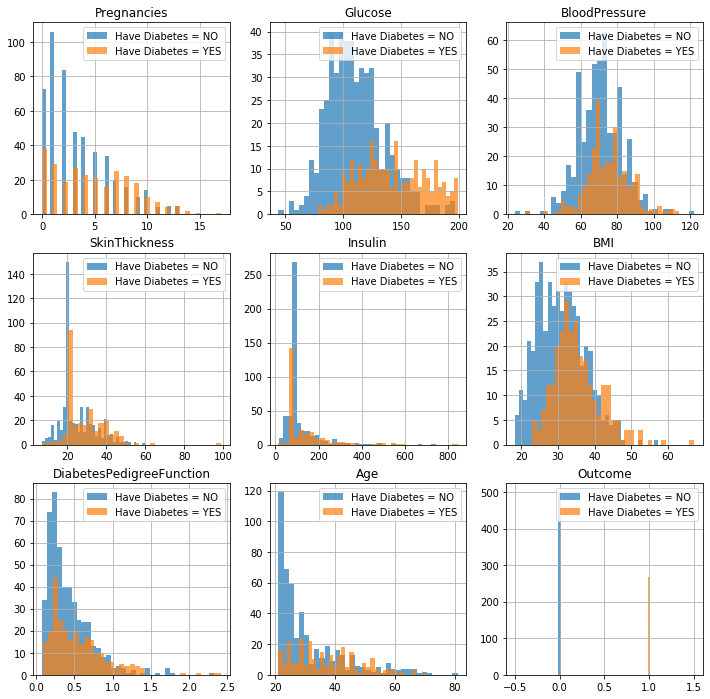

In [33]:
fig = plt.figure(figsize=(12, 12))
for i, feature in enumerate(data.columns):
    ax = fig.add_subplot(3, 3, i + 1)
    data.groupby("Outcome")[feature].hist(ax=ax, bins=35, alpha=0.7)
    ax.set_title(feature)
    ax.legend(["Have Diabetes = NO", "Have Diabetes = YES"])
plt.show()

**3. (2 балла)** Разбейте данные на обучающую и тестовую часть в соотношении 70:30. Обучите `BaggingClassifier` на деревьях (поставьте параметр `'base_estimator' = DecisionTreeClassifier()`) и `RandomForest`. Возьмите количество базовых алгоритмов, равное 10. Посчитайте accuracy, recall и precision. Есть ли какая-то разница между моделями и их результатами? Как вы думаете, почему получились такие результаты?

*Подсказка: создайте отдельную функцию для вывода метрик качества.*

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [99]:
def predict_print_metrics(algorithm, args):
    X_train, X_test, y_train, y_test = args 
    algorithm.fit(X_train, y_train)
    pred = algorithm.predict(X_test)
    """accuracy"""
    print(f"accuracy: {accuracy_score(pred, y_test)}")
    """precision"""
    print(f"precision: {precision_score(pred, y_test)}")
    """recall"""
    print(f"recall: {recall_score(pred, y_test)}")
    return pred

In [182]:
X = data.drop("Outcome", axis=1)
y = data["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(537, 8) (537,)
(231, 8) (231,)


In [101]:
args = (X_train, X_test, y_train, y_test)

In [138]:
# Bagging
bf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=13)
bf_pred = predict_print_metrics(bf, args)

accuracy: 0.7359307359307359
precision: 0.5287356321839081
recall: 0.696969696969697


In [139]:
#Random Forest

rf = RandomForestClassifier(n_estimators=10, random_state=13)
rf_pred = predict_print_metrics(rf, args)

accuracy: 0.7402597402597403
precision: 0.5057471264367817
recall: 0.7213114754098361


In [140]:
my_rf = RandomForest(n_estimators=10) # works like RandomForestClassifier from sklearn
my_rf_pred = predict_print_metrics(rf, args)

accuracy: 0.7402597402597403
precision: 0.5057471264367817
recall: 0.7213114754098361


Модели дают почти одинаковый accuracy. Так как бэггинг лучше справляется с разбросом, то Precision выше. Recall с точностью до сотой одинаковый.

**4. (2 балл)** Для случайного леса проанализируйте значение AUC-ROC на этих же данных в зависимости от изменения параметров:
* `'n_estimators'` (можно перебрать около 10 значений из отрезка от 10 до 1500)
* `'min_samples_leaf'` (сетку значений можете выбрать на ваше усмотрение)

Постройте соответствующие графики зависимости AUC-ROC от этих параметров. Какие выводы вы можете сделать?

In [160]:
n_estimators_lst =  np.linspace(10, 1500, 10, dtype=int)
print(n_estimators_lst)

[  10  175  341  506  672  837 1003 1168 1334 1500]


In [184]:
roc_auc_metric = []
for elem in n_estimators_lst:
    rf = RandomForestClassifier(n_estimators=elem, random_state=13)
    rf.fit(X_train, y_train)
    pred_proba = rf.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test,pred_proba)
    roc_auc_metric.append(roc_auc)

roc_auc_metric = np.array(roc_auc_metric)

0.8325750319284801 1168


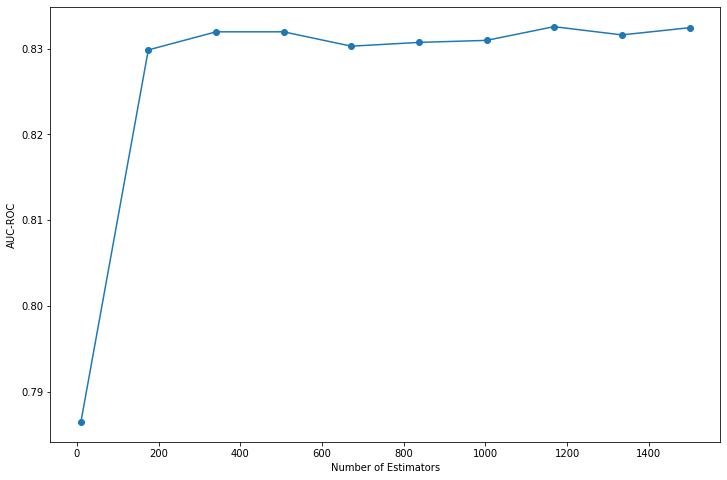

In [185]:
plt.figure(figsize=(12, 8))
plt.plot(n_estimators_lst, roc_auc_metric, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('AUC-ROC')

print(np.max(roc_auc_metric), n_estimators_lst[roc_auc_metric.argmax()])
plt.show()

In [186]:
leaf_samples = np.arange(1, 101, 5)

In [196]:
roc_auc_metric = []
for leaf in leaf_samples:
    rf = RandomForestClassifier(n_estimators=1168, min_samples_leaf=leaf, random_state=13)
    rf.fit(X_train, y_train)
    pred = rf.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, pred)
    roc_auc_metric.append(roc_auc)

roc_auc_metric = np.array(roc_auc_metric)

0.8428320561941253 11


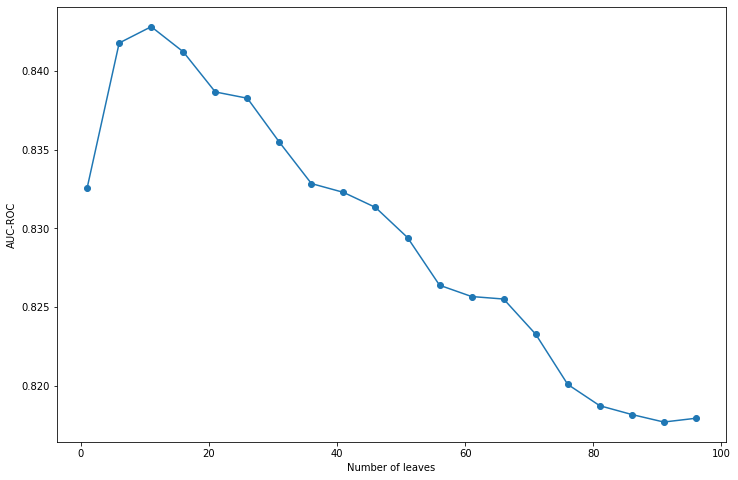

In [197]:
plt.figure(figsize=(12, 8))
plt.plot(leaf_samples, roc_auc_metric, marker='o')
plt.xlabel('Number of leaves')
plt.ylabel('AUC-ROC')

print(np.max(roc_auc_metric), leaf_samples[np.argmax(roc_auc_metric)])
plt.show()

In [190]:
roc_auc_metric = []
for leaf in leaf_samples:
    rf = RandomForestClassifier(min_samples_leaf=leaf, random_state=13)
    rf.fit(X_train, y_train)
    pred = rf.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, pred)
    roc_auc_metric.append(roc_auc)

roc_auc_metric = np.array(roc_auc_metric)

0.8448275862068966 6


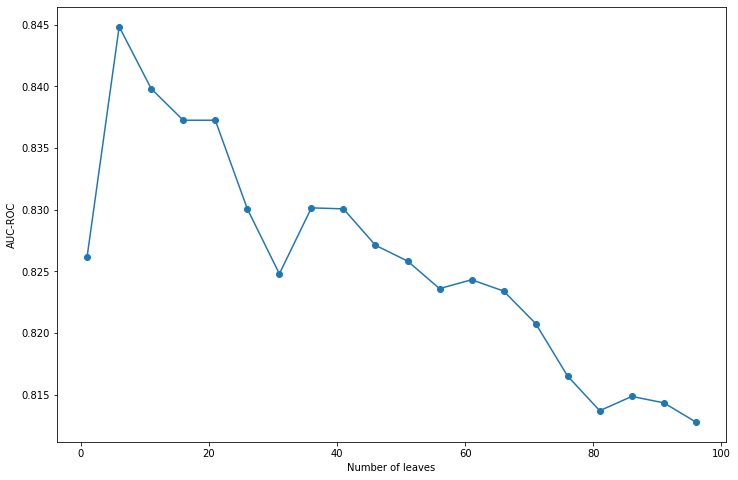

In [193]:
plt.figure(figsize=(12, 8))
plt.plot(leaf_samples, roc_auc_metric, marker='o')
plt.xlabel('Number of leaves')
plt.ylabel('AUC-ROC')

print(np.max(roc_auc_metric), leaf_samples[np.argmax(roc_auc_metric)])
plt.show()

При оптимальном количество деревьев на заданном сиде – максимальное число деревьев (1168) будет оптимально. Количество листьев зависит от количества деревьев в ансамбле. При базовом параметре оптимальное количество листьев – 6, а при оптимальном 11. Однако AUC-ROC в обоих случаях будет отличаться всего < 0.1, что незначительно. На текущем сиде, уже малое количество деревьев
позволяет добиться хорошего качества и малое количество листьев позволяет добиться высокого качества, а их увеличение ухудшает качество модели при любом количестве деревьев.

**5. (1 балл)**. Посмотрите, оказались ли какие-то признаки более важными, чем остальные? Воспользуйтесь соответствующим атрибутом случайного леса в библиотеке `sklearn`, чтобы построить `barplot`.

In [211]:
rf = RandomForestClassifier(n_estimators=1168, min_samples_leaf=11, random_state=13)
rf.fit(X_train, y_train)
w = rf.feature_importances_
for i in range(len(w)):
    print(f"{X_train.columns[i]}: {w[i]}")

Pregnancies: 0.09011853738833657
Glucose: 0.36697181724669564
BloodPressure: 0.04884743216673419
SkinThickness: 0.05312037551349705
Insulin: 0.04939393279469318
BMI: 0.16523635913332077
DiabetesPedigreeFunction: 0.07516614665564732
Age: 0.15114539910107516


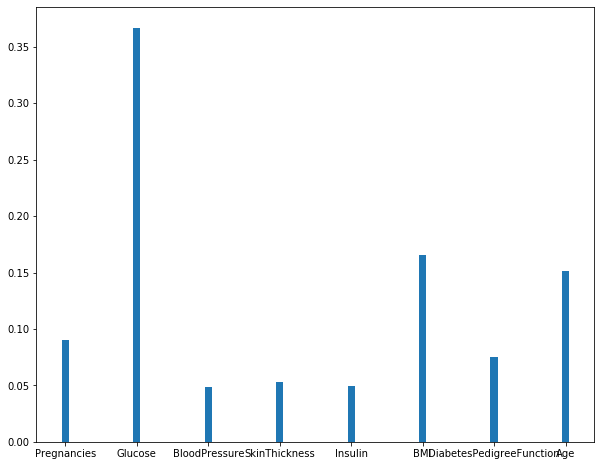

In [218]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.bar(X_train.columns,w, width=0.1)
plt.show()

Самые важные признаки – это Glucose, BMI, Age

**6. (2 балла)** Обучите `HistGradientBoostingClassifier` и `GradientBoostingClassifier` из `sklearn`. Опишите подробно, в чем заключается разница этих моделей. Подберите подходящее количество деревьев и проанализируйте метрики, с которыми мы работали выше.

In [220]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV 

Histgradientboosting основан на LightGBM и должен лучше отрабатывать на больших датасетах. Также Histgradientboosting
самостоятельно адаптируется под пропущенные значения. Разбиение дерева на пропущенных значениях строится таким образом: пропущенные значения отправляются в левый или правый лист в зависимости от качества разбиения, либо если в трейне не встретились пропуски, то на предсказании отправляются в лист с наибольшим числом элементов.
На наших данных, в которых пропусков нет и существующие заполнены алгоритмы должны работать схожим образом и выдавать похожее качество.

In [224]:
gb = GradientBoostingClassifier(random_state = 13)
gb.fit(X_train, y_train)
gb_pred = predict_print_metrics(gb, args)
gb_proba = gb.predict_proba(X_test)[:, 1]
print(f"roc-auc (gb): {roc_auc_score(y_test, gb_proba)}\n")

hgb = HistGradientBoostingClassifier(random_state = 13)
hgb.fit(X_train, y_train)
hgb_pred = predict_print_metrics(hgb, args)
hgb_proba = hgb.predict_proba(X_test)[:, 1]
print(f"roc-auc (hgb): {roc_auc_score(y_test, hgb_proba)}")


accuracy: 0.7575757575757576
precision: 0.6091954022988506
recall: 0.7066666666666667
roc-auc (gb): 0.8169699872286079

accuracy: 0.7445887445887446
precision: 0.5747126436781609
recall: 0.6944444444444444
roc-auc (hgb): 0.7934227330779055


In [225]:
param_grid_gb = {"n_estimators": np.linspace(10, 1500, 10, dtype=int), "max_depth": np.linspace(3, 20, 5, dtype=int)}
param_grid_hgb = {"max_iter": np.linspace(10, 1500, 10, dtype=int)}

In [230]:
gb_cv = GridSearchCV(gb, param_grid_gb, cv=5)
gb_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [231]:
print(gb_cv.best_params_, gb_cv.best_score_)

{'max_depth': 7, 'n_estimators': 175} 0.767220491519557


In [232]:
hgb_cv = GridSearchCV(hgb, param_grid_hgb, cv=5)
hgb_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=HistGradientBoostingClassifier(l2_regularization=0.0,
                                                      learning_rate=0.1,
                                                      loss='auto', max_bins=255,
                                                      max_depth=None,
                                                      max_iter=100,
                                                      max_leaf_nodes=31,
                                                      min_samples_leaf=20,
                                                      n_iter_no_change=None,
                                                      random_state=13,
                                                      scoring=None, tol=1e-07,
                                                      validation_fraction=0.1,
                                                      verbose=0,
                                                      warm_start=False),
   

In [233]:
print(hgb_cv.best_params_, hgb_cv.best_score_)

{'max_iter': 506} 0.7577881619937694


In [235]:
gb = GradientBoostingClassifier(max_depth=7, n_estimators=175, random_state = 13)
gb.fit(X_train, y_train)
gb_pred = predict_print_metrics(gb, args)
gb_proba = gb.predict_proba(X_test)[:, 1]
print(f"roc-auc (gb): {roc_auc_score(y_test, gb_proba)}\n")

hgb = HistGradientBoostingClassifier(random_state = 13, max_iter=506)
hgb.fit(X_train, y_train)
hgb_pred = predict_print_metrics(hgb, args)
hgb_proba = hgb.predict_proba(X_test)[:, 1]
print(f"roc-auc (hgb): {roc_auc_score(y_test, hgb_proba)}")

accuracy: 0.7619047619047619
precision: 0.632183908045977
recall: 0.7051282051282052
roc-auc (gb): 0.7878352490421456

accuracy: 0.7186147186147186
precision: 0.5632183908045977
recall: 0.6447368421052632
roc-auc (hgb): 0.7755427841634738


**7. (1.5 балла)** Вспомните, что представляет из себя стэкинг моделей. Возьмите в качестве базовых моделей любой ансамблевый метод из тех, которые были использованы выше, и простой классификатор из уже вами изученных на курсе. В качестве мета-классификатора (модели, обученной на ответах) используйте лог-регресссию. Посчитайте метрики для мета-классификатора. Улучшилось ли качество?

В данном пункте мы можете как написать код для стекинга сами, так и использовать [`StackingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html#sklearn.ensemble.StackingClassifier).

In [240]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression


In [247]:
learners = [('randomforest', 
                   GradientBoostingClassifier(random_state=13)),
                 ('decisiontree',
                   LinearSVC(random_state=13))
                ]

In [248]:
sc = StackingClassifier(estimators=learners, final_estimator=LogisticRegression(random_state=13))
sc.fit(X_train, y_train)

sc_pred = predict_print_metrics(sc, args)
sc_proba = sc.predict_proba(X_test)[:, 1]
print(f"roc-auc (sc): {roc_auc_score(y_test, sc_proba)}")


accuracy: 0.7402597402597403
precision: 0.45977011494252873
recall: 0.7547169811320755
roc-auc (sc): 0.8195242656449553


Precision упала, но при это roc-auc и recall довольно высокие, так что применение стэкинга разумно на нашем датасете.